In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [174]:
df = pd.read_csv('titanic.csv',delimiter=',')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [176]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [177]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [178]:
def data_frame_prepr(data_frame):
    data_frame.drop('Cabin',axis=1,inplace=True)
    data_frame['Age'].fillna(0,inplace=True)
    data_frame.replace(['male','female'],[0,1],inplace=True)
    data_frame['Embarked'].replace(['Q','S','C'],[1,2,3],inplace=True)
    data_frame['Name'] = data_frame['Name'].apply(lambda x: len(x))
    data_frame.fillna(df.mean(),inplace=True)
    return data_frame
df = data_frame_prepr(df)

In [179]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [180]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,26.965208,0.352413,23.799293,0.523008,0.381594,32.204208,2.102362
std,257.353842,0.486592,0.836071,9.281607,0.477990,17.596074,1.102743,0.806057,49.693429,0.514601
min,1.000000,0.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.000000,0.000000,6.000000,0.000000,0.000000,7.910400,2.000000
50%,446.000000,0.000000,3.000000,25.000000,0.000000,24.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,30.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,82.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


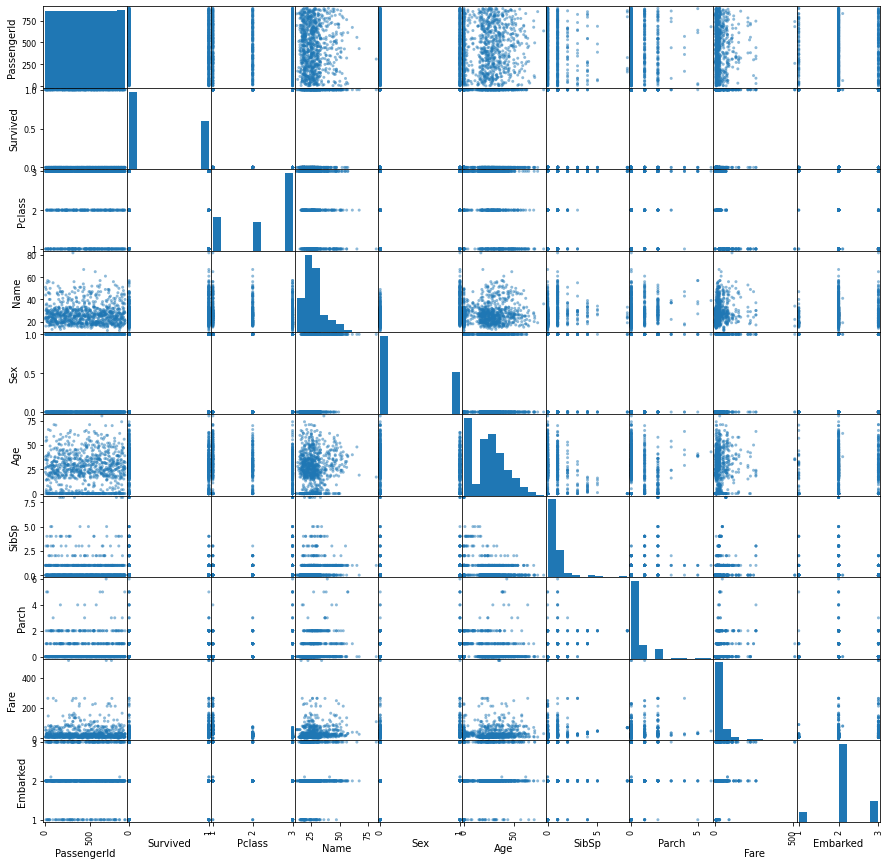

In [181]:
pd.plotting.scatter_matrix(df,figsize=(15,15))
plt.show()

In [182]:
train, test = train_test_split(df, test_size=0.05)
Y_train = train['Survived']
X_train = train.drop(['Survived','Ticket'],axis=1)
Y_test = test['Survived']
X_test = test.drop(['Survived','Ticket'],axis=1)

In [183]:
simply_tree = tree.DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=4)
simply_tree.fit(X_train,Y_train)
simply_tree.score(X_test,Y_test)

0.8

In [184]:
np.count_nonzero(simply_tree.predict(X_test) - Y_test.to_numpy()) / len(X_test)

0.2

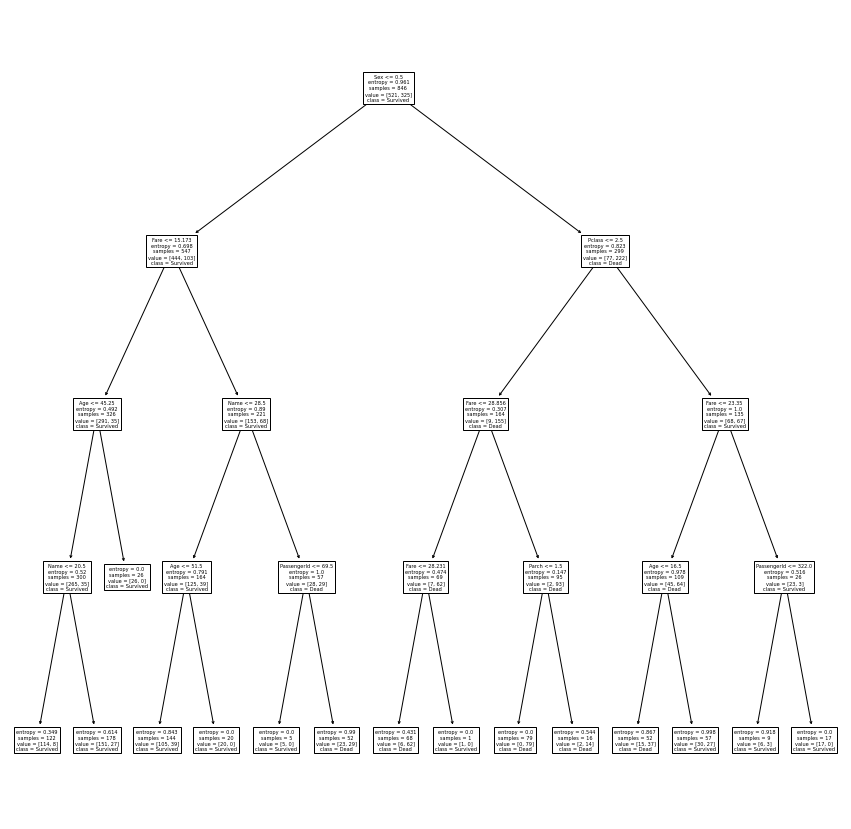

In [185]:
fig, axes = plt.subplots(1,1,figsize=(15,15))
axes = tree.plot_tree(simply_tree,feature_names=X_train.columns,class_names=['Survived','Dead'])
plt.show()

In [187]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,Y_train)
random_forest.score(X_test,Y_test)

0.8444444444444444

In [188]:
np.count_nonzero(random_forest.predict(X_test) - Y_test.to_numpy()) / len(X_test)

0.15555555555555556

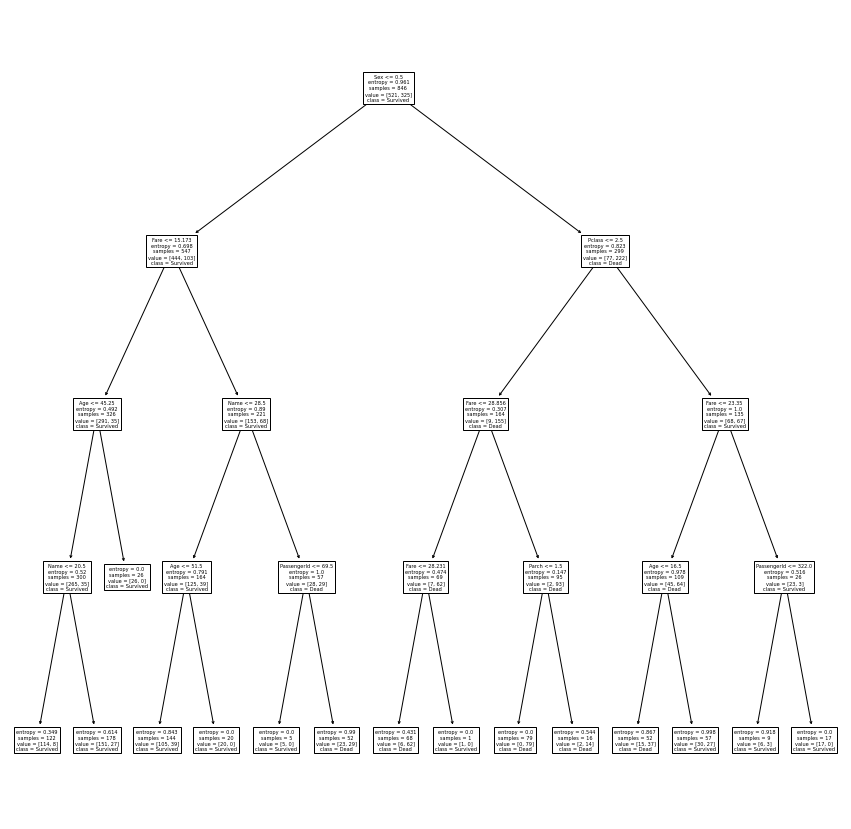

In [189]:
fig, axes = plt.subplots(1,1,figsize=(15,15))
axes = tree.plot_tree(simply_tree,feature_names=X_train.columns,class_names=['Survived','Dead'])
plt.show()

In [191]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
X = df.drop(['Survived','Ticket'],axis=1)
Y = df['Survived']
scores = cross_val_score(random_forest,X,Y, cv=5)
print(scores)

[0.72625698 0.82022472 0.83707865 0.81460674 0.80898876]


In [202]:
import csv
competition_df = pd.read_csv('competition/test.csv',delimiter=',')
competition_df = data_frame_prepr(competition_df)
TEST_X_kaggle = competition_df.drop(['Ticket'],axis=1)
predicts = random_forest.predict(TEST_X_kaggle)
indx = competition_df['PassengerId']

with open('sub.csv', 'w', newline='') as file:
    file.write('PassengerId,Survived\n')
    for i in range(len(indx)):
        idx = competition_df.loc[i]['PassengerId']
        file.write(f'{idx},{predicts[i]}\n')
        